In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        y = '4'
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pathlib

data_dir = '/kaggle/input/arabic-hwr-ai-pro-intake1/train/'
data_dir = pathlib.Path(data_dir)


In [4]:
data_dir

PosixPath('/kaggle/input/arabic-hwr-ai-pro-intake1/train')

In [5]:
batch_size = 32
img_height = 32
img_width = 32


In [6]:

import glob
filelist = glob.glob('/kaggle/input/arabic-hwr-ai-pro-intake1/train/*.png')


In [7]:

filelist.sort()

In [8]:

# get ndarray of [no. of images, height, width] dimentions. (to grayscale to avoid 4d matrix)
from PIL import Image, ImageOps
#x = np.array([np.array(ImageOps.grayscale(Image.open(fname))) for fname in filelist])
x = np.array([np.array(Image.open(fname)) for fname in filelist])

#gray_image = ImageOps.grayscale(og_image)


In [9]:
#plt.imshow(x[0])

In [10]:
"""
# make sure all images are 32x32
#im = Image.open(filelist[0])
for i in filelist:
    img = Image.open(i)
    if img.size == (32,32):
        print(i)
        break
"""

'\n# make sure all images are 32x32\n#im = Image.open(filelist[0])\nfor i in filelist:\n    img = Image.open(i)\n    if img.size == (32,32):\n        print(i)\n        break\n'

In [11]:
#x.shape

In [12]:
labelsCol = pd.read_csv('/kaggle/input/arabic-hwr-ai-pro-intake1/train.csv')['label']

(array([480., 480., 480., 480., 480., 480., 480., 480., 480., 480., 480.,
        480., 480., 480., 480., 480., 480., 480., 480., 480., 480., 480.,
        480., 480., 480., 480., 480., 480.]),
 array([ 1.        ,  1.96428571,  2.92857143,  3.89285714,  4.85714286,
         5.82142857,  6.78571429,  7.75      ,  8.71428571,  9.67857143,
        10.64285714, 11.60714286, 12.57142857, 13.53571429, 14.5       ,
        15.46428571, 16.42857143, 17.39285714, 18.35714286, 19.32142857,
        20.28571429, 21.25      , 22.21428571, 23.17857143, 24.14285714,
        25.10714286, 26.07142857, 27.03571429, 28.        ]),
 <BarContainer object of 28 artists>)

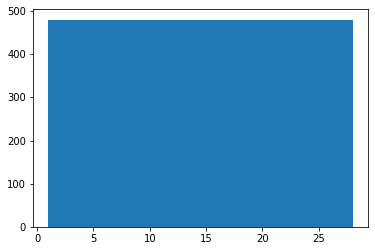

In [13]:
plt.hist(labelsCol, bins=28)

In [14]:
labelsCol = np.array(labelsCol)
labelsCol.shape

(13440,)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, labelsCol, test_size=0.2, random_state=42)

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
#from keras.utils import to_categorical
#number_of_classes = 28

# making labels from 0 to 27 instead of 1 to 28
y_train = y_train - 1
y_test = y_test - 1

In [18]:
X_train.shape

(10752, 32, 32, 4)

In [19]:
"""
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras import regularizers
"""

'\nfrom tensorflow.keras import Sequential\nfrom tensorflow.keras.layers import Dense, Flatten,Dropout\nfrom tensorflow.keras import regularizers\n'

In [20]:
# feed forward network:
"""
model = Sequential([Flatten(input_shape=(32,32)), 
                    Dense(256, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.003)), 
                    
                    Dense(256, activation=tf.nn.relu), 
                    
                    Dense(64, activation=tf.nn.relu),

                    Dense(28, activation=tf.nn.softmax)])
"""

'\nmodel = Sequential([Flatten(input_shape=(32,32)), \n                    Dense(256, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.003)), \n                    \n                    Dense(256, activation=tf.nn.relu), \n                    \n                    Dense(64, activation=tf.nn.relu),\n\n                    Dense(28, activation=tf.nn.softmax)])\n'

In [21]:
#model.summary()

In [22]:
"""
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
"""

"\nmodel.compile(optimizer = tf.optimizers.Adam(),\n              loss = 'sparse_categorical_crossentropy',\n              metrics=['accuracy'])\n"

In [23]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [24]:
# My new networkkkkkkkkkkk (cnn)
"""
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 4)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(28, activation=tf.nn.softmax))
"""

"\nmodel = models.Sequential()\nmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 4)))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(28, activation=tf.nn.softmax))\n"

In [25]:
# My new networkkkkkkkkkkk (cnn)

# .STARTED EDITING BEFORE DOING BATCH NORM. WILL TRY BATCH NORM W/ PREVIOUS RESULT FIRST.

kernel_initializer = 'uniform'
model = models.Sequential()

model.add(layers.BatchNormalization(input_shape=(32, 32, 4)))

model.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', kernel_initializer=kernel_initializer))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', kernel_initializer=kernel_initializer))
model.add(layers.Dropout(0.1))

model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.2))



model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', kernel_initializer=kernel_initializer))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', kernel_initializer=kernel_initializer))
model.add(layers.Dropout(0.1))


model.add(layers.MaxPooling2D((2, 2)))

#AveragePooling2D

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer=kernel_initializer))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer=kernel_initializer))
model.add(layers.Dropout(0.1))

#model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu',kernel_initializer=kernel_initializer))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu',kernel_initializer=kernel_initializer))
model.add(layers.Dropout(0.1))


#model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))

#model.add(layers.Flatten())
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())

#model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())


model.add(layers.Dense(28, activation=tf.nn.softmax))



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [26]:
# My new networkkkkkkkkkkk (cnn)
#BEST MODEL SO FAR
"""
kernel_initializer = 'glorot_uniform'
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', input_shape=(32, 32, 4), kernel_initializer=kernel_initializer))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.2))


model.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', kernel_initializer=kernel_initializer))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))


model.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer=kernel_initializer))
#model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(256, (3, 3),padding='same', activation='relu',kernel_initializer=kernel_initializer))
#model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))

#model.add(layers.Flatten())
model.add(layers.GlobalAveragePooling2D())
#model.add(layers.Dense(32, activation='relu'))


model.add(layers.Dense(28, activation=tf.nn.softmax))
"""

"\nkernel_initializer = 'glorot_uniform'\nmodel = models.Sequential()\nmodel.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', input_shape=(32, 32, 4), kernel_initializer=kernel_initializer))\n#model.add(layers.BatchNormalization())\nmodel.add(layers.MaxPooling2D((2, 2)))\n#model.add(layers.Dropout(0.2))\n\n\nmodel.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', kernel_initializer=kernel_initializer))\n#model.add(layers.BatchNormalization())\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Dropout(0.2))\n\n\nmodel.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer=kernel_initializer))\n#model.add(layers.BatchNormalization())\n#model.add(layers.Dropout(0.2))\nmodel.add(layers.MaxPooling2D((2, 2)))\n\n\nmodel.add(layers.Conv2D(256, (3, 3),padding='same', activation='relu',kernel_initializer=kernel_initializer))\n#model.add(layers.BatchNormalization())\n#model.add(layers.Dropout(0.2))\nmodel.add(layers.MaxPooling2D((2,

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 4)         16        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        592       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0

In [28]:
model.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [29]:
 model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test) )
                    #validation_data=(test_images, test_labels))

        

2021-11-06 15:28:24.844346: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
336/336 [==============================] - 21s 49ms/step - loss: 1.8380 - accuracy: 0.4463 - val_loss: 5.0699 - val_accuracy: 0.0346
Epoch 2/50
336/336 [==============================] - 15s 44ms/step - loss: 0.7341 - accuracy: 0.7654 - val_loss: 1.3526 - val_accuracy: 0.5350
Epoch 3/50
336/336 [==============================] - 15s 44ms/step - loss: 0.4876 - accuracy: 0.8422 - val_loss: 0.5388 - val_accuracy: 0.8151
Epoch 4/50
336/336 [==============================] - 16s 47ms/step - loss: 0.3645 - accuracy: 0.8797 - val_loss: 0.3490 - val_accuracy: 0.8876
Epoch 5/50
336/336 [==============================] - 15s 44ms/step - loss: 0.3090 - accuracy: 0.9034 - val_loss: 0.3364 - val_accuracy: 0.8854
Epoch 6/50
336/336 [==============================] - 16s 46ms/step - loss: 0.2561 - accuracy: 0.9195 - val_loss: 0.4358 - val_accuracy: 0.8620
Epoch 7/50
336/336 [==============================] - 15s 45ms/step - loss: 0.2272 - accuracy: 0.9279 - val_loss: 0.1872 - val_accuracy:

In [30]:
evaluation = model.evaluate(X_test, y_test)
print("Accuracy on the testing images is {}".format(evaluation[1]*100))

84/84 [==============================] - 1s 9ms/step - loss: 0.1404 - accuracy: 0.9624
Accuracy on the testing images is 96.24255895614624


In [31]:
# import test data

In [32]:
import glob
filelist_test = glob.glob('/kaggle/input/arabic-hwr-ai-pro-intake1/test/*.png')


In [33]:
filelist_test.sort()

In [34]:
# get ndarray of [no. of images, height, width] dimentions. (to grayscale to avoid 4d matrix)
from PIL import Image, ImageOps
#x = np.array([np.array(ImageOps.grayscale(Image.open(fname))) for fname in filelist])
x_test = np.array([np.array(Image.open(fname)) for fname in filelist_test])

#gray_image = ImageOps.grayscale(og_image)


In [35]:
x_test.shape

(3360, 32, 32, 4)

In [36]:
x_test = x_test / 255

In [37]:
output = model.predict(x_test)

In [38]:
y_classes = output.argmax(axis=-1)


In [39]:
np.unique(y_classes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [40]:
y_classes = y_classes + 1

In [41]:
output.shape

(3360, 28)

In [42]:
test_labels = pd.read_csv('/kaggle/input/arabic-hwr-ai-pro-intake1/test.csv')

In [43]:
test_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3360 non-null   int64
dtypes: int64(1)
memory usage: 26.4 KB


In [44]:
test_labels['label'] = y_classes

In [45]:
test_labels.head()

,id,label
0,0,26
1,1,10
2,2,1
3,3,10
4,4,15


1. 

In [46]:
test_labels.to_csv('submission.csv', index=False)


In [47]:
# new sun

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define the grid search parameters
optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam']
kernel_initializer = ['normal', 'uniform']
activation = ['relu', 'linear', 'tanh']

param_grid = dict(optimizer=optimizer, kernel_initializer=kernel_initializer, activation=activation)

# count number of different parameters values combinations
parameters_number = 1
for x in param_grid:
  parameters_number = parameters_number * len(param_grid[x]) 
print("Number of different parameter combinations = {}".format(parameters_number))


Number of different parameter combinations = 24


In [48]:
epochs = 5
batch_size = 20 # 20 divides the training data samples

#creating the models with different hyperparameters
"""
for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    fit_model(a, b, c, epochs)
    """


"\nfor a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:\n    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}\n    print(params)\n    fit_model(a, b, c, epochs)\n    "

In [49]:
def fit_model(opt, kernel_init, activation,epochs, batch_size=20):
    
    kernel_initializer = kernel_init
    model = models.Sequential()
    model.add(layers.BatchNormalization(input_shape=(32, 32, 4)))
    model.add(layers.Conv2D(8, (3, 3),padding='same', activation=activation, kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D((2, 2)))
    #model.add(layers.Dropout(0.2))

    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(16, (3, 3),padding='same', activation=activation, kernel_initializer=kernel_initializer))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    #AveragePooling2D

    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3),padding='same', activation=activation, kernel_initializer=kernel_initializer))
    #model.add(layers.Dropout(0.2))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3),padding='same', activation=activation,kernel_initializer=kernel_initializer))
    #model.add(layers.BatchNormalization())
    #model.add(layers.Dropout(0.2))
    model.add(layers.MaxPooling2D((2, 2)))

    #model.add(layers.Flatten())
    model.add(layers.GlobalAveragePooling2D())
    #model.add(layers.Dense(32, activation='relu'))


    model.add(layers.Dense(28, activation=tf.nn.softmax))


    model.compile(optimizer=opt,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test) )
                        #validation_data=(test_images, test_labels))
